<img src = "https://universidadean.edu.co/sites/default/files/noticias/galeria/Logo-Universidad-Ean-fondo-negro-Galeria_1.jpg" alt = "Universidad EAN" width = "50%"  height="160
0">  </img>

En esta guía de trabajo usted deberá poner en práctica los conceptos fundamentales y las herramientas para realizar **análisis de correlación** y **análisis de regresión** con *Python*.  

Para iniciar, se requiere cargar las librarías necesarias, en caso de necesitar otras puede agregarlas a la celda.

In [41]:
# Cargar librerías
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# librerías relacionadas con modelos de regresión
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# **Análisis de correlación y modelos de regresión**  
---  

La actividad a desarrollar estará centrada en explorar de manera práctica dos conceptos importantes:

**Análisis de correlación**: Se puede definir como un proceso estadístico en el que se busca identificar asociaciones (relaciones o dependencias) entre dos variables. Estas relaciones se pueden medir a partir de un coeficiente de correlación.

**Análisis de regresión** es el proceso estadístico en el que se busca modelar o definir relaciones y asociaciones específicas entre variables.




## **Datos**
---

La base de datos a utilizar se denimona **`Framingham`**. Este conjunto de datos está disponible públicamente en el sitio web de [Kaggle](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression), y es de un estudio de riesgo cardiovascular sobre los residentes de la ciudad de Framingham, Massachusetts en Estados Unidos. El objetivo de la clasificación es predecir si el paciente tiene un riesgo de 10 años de padecer una futura enfermedad coronaria (CHD). El conjunto de datos proporciona la información de los pacientes con más de 3.000 registros y 15 atributos. Se incluyen diferentes variables con factores de riesgo potenciales a nivel demográficos, comportamentales y médicos.

**Demográficos:**
* **`male`**: Masculino o femenino (Nominal).
* **`age`**: Edad del paciente (las edades registradas han sido truncadas a números enteros, sin embargo, recordar que la edad en una variable numérica continua).

**Comportamiento:**
* **`currentSmoker`**: Si el paciente es o no fumador actualmente.
* **`cigsPerDay`**: El número de cigarrillos que la persona fuma en promedio en un día (puede considerarse continuo, ya que se puede tener cualquier número de cigarrillos, incluso medio cigarrillo).

**Historia médica:**
* **`BPMeds`**: Si el paciente estaba o no tomando medicamentos para la presión sanguínea (nominal).
* **`prevalentStroke`**: Si el paciente ha tenido previamente una apoplejía o no (nominal).
* **`prevalentHyp`**: Si el paciente era o no hipertenso (nominal).
* **`diabetes`**: Si el paciente tenía o no diabetes (nominal).
* **`totChol`**: Nivel de colesterol total (continuo).
* **`sysBP`**: Presión sanguínea sistólica (continua).
* **`diaBP`**: Presión arterial diastólica (continua).
* **`BMI`**: Índice de Masa Corporal - IMC (continuo).
* **`heartRate`**: Ritmo cardíaco (continuo).
* **`glucose`**: Nivel de glucosa (continuo).

**Variable objetivo deseada:**
* **`TenYearCHD`**: Riesgo de enfermedad coronaria CHD a 10 años (binario: "1", significa "Sí", "0" significa "No").

In [42]:
url = "https://docs.google.com/uc?export=download&id=1z2k_-8DtwRGFZhRlSmJBwLn6d0JdLt_k"
base_datos = pd.read_csv(url)
base_datos.dropna(axis=0, inplace=True) # Se eliminan registros con valores faltantes
base_datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


**Nombres de los integrantes del grupo (Completar)**

In [43]:
base_datos.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## **1.0 Exploración de la correlación**  
---
Suponga que usted quiere modelar la relación existente entre la presión sistólica de los pacientes y su edad.

La primera tarea a relizar consiste en explorar la relación entre las variables de forma gráfica. Construya una gráfica de dispersión donde se pueda revisar la asociación entre las variables, recuerde realizar un análisis de la información que muestra la gráfica.

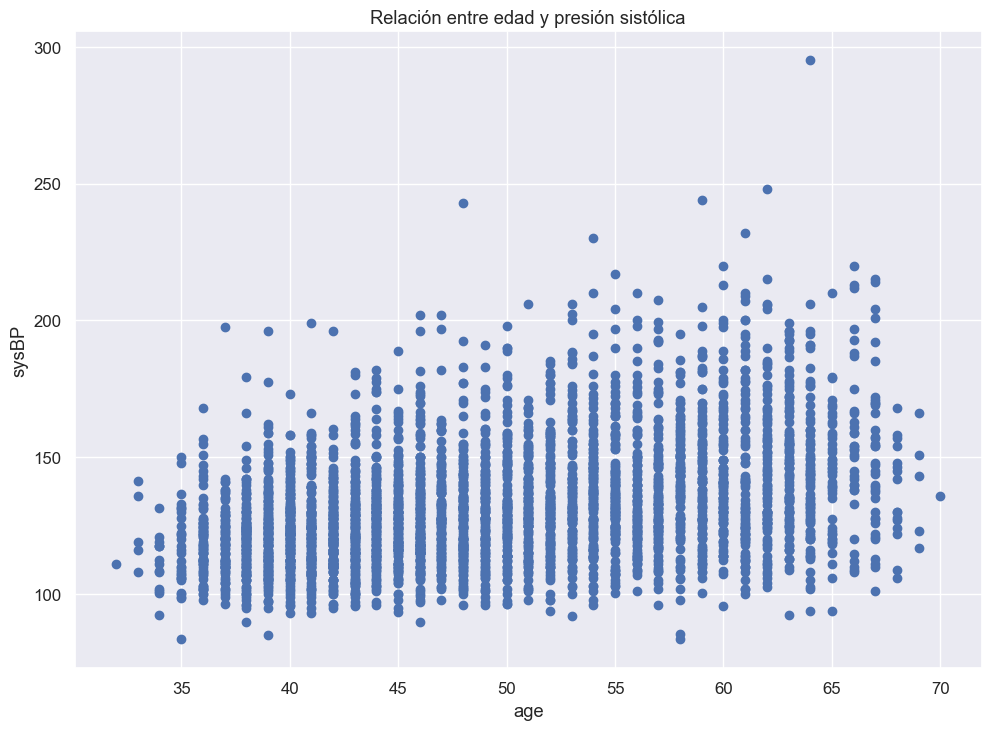

In [44]:
# graficar la relacion entre las variables

plt.scatter(base_datos['age'], base_datos['sysBP'])
plt.xlabel('age')
plt.ylabel('sysBP')
plt.title('Relación entre edad y presión sistólica')
plt.show()


La grafica muestra una tendencia creciente de la presión sistólica con el aumento de la edad. Se visualiza un rango de presión sistólica entre 100 y 150 para las edades menores en registro (35 - 40), mientras que en las edades mayores (60 - 70) se encuentra entre 100 y 200. Se pueden observar datos atípicos superiores a 200 e inferiores a 100 en diferentes edades, com mayor recurrencia en edades mayores y presión alta.

## **2.0 Exploración de la correlación**  
---
Para revisar la asociación lineal entre las variables presión sistólica de los pacientes y edad, se requiere calcular el coeficente de correlación lineal de Pearson.  
Hallar el coeficiente de correlación para estas dos variables y analizar el resultado.

In [45]:
# calcular el coeficiente de correlación de Pearson

correlacion = base_datos['age'].corr(base_datos['sysBP'])
print(correlacion)

0.38855059886870275


El coeficiente de correlación de Pearson nos muestra una correlación positiva leve, esto quiere decir que no hay una correlación tan fuerte entre las variables, aunque si la hay y parece indicar que hay algún efecto de la edad sobre la presión sistólica.

## **3.0 Estimar los parámetros del modelo**  
---
Se requiere estimar la **pendiente ($β$)** y el **intercepto (α)** de la regresión para poder construir la ecuación general de la recta que mejor describe la relación entre las dos variables:
Para este caso el modelo tendrá la forma:

$sysBP = β * age + α$.

Realice la estimación de los parámetros del modelo de regresión lineal simple y relice un análisis de cada parámetro estimado.


In [46]:
# estimar la pendiente y el intercepto de la recta de regresión con la formula matemática

pendiente, intercepto, r_value, p_value, std_err = stats.linregress(base_datos['age'], base_datos['sysBP'])
print('Pendiente: ', pendiente)
print('Intercepto: ', intercepto)


Pendiente:  1.002674746890769
Intercepto:  82.67803173108224


Se observa un intercepto para el eje *y* (`sysBP`) de 82.7, que para los datos en análisis indica que el comportamiento de la presión sistólica inicia con un valor constante de 82.7. La pendiente indica que por cada incremento de edad en una unidad hay un aumento de una unidad de presión sistólica.

## **4.0 Correlación lineal múltiple - Relación entre variables**  
---

Para construir un modelo de regresión lineal múltiple, se consideran dos o más variables regresoras, estas pueden ser de tipo numérico o cualitativo. Para este caso,  considere todas las variables numéricas de la base principal y seleccione como variable respuesta la presión sistólica de los pacientes.

El primer paso para definir un modelo lineal múltiple consiste en estudiar la relación que existe entre las variables. Con esta información se puede identificar los mejores predictores para el modelo e identificar otras características que podrían afectar el desempeño del modelo.
- Construya una matriz que permita observar la correlación de todas las variables numéricas.
- Presente una gráfica adecuada que represente la correlación entre las variables.
- ¿Qué variables y en qué medida se relacionan mejor con la variable de interés?


In [47]:
# revisar la correlación entre todas las variables

correlacion = base_datos.corr()
print(correlacion)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.024387   0.017677       0.206778    0.331243   
age             -0.024387  1.000000  -0.158961      -0.210862   -0.189099   
education        0.017677 -0.158961   1.000000       0.025253    0.013527   
currentSmoker    0.206778 -0.210862   0.025253       1.000000    0.773819   
cigsPerDay       0.331243 -0.189099   0.013527       0.773819    1.000000   
BPMeds          -0.052128  0.134670  -0.013647      -0.051936   -0.046479   
prevalentStroke -0.002308  0.050864  -0.030353      -0.038159   -0.036283   
prevalentHyp     0.000806  0.306693  -0.079100      -0.107561   -0.069890   
diabetes         0.013833  0.109027  -0.039547      -0.041859   -0.036934   
totChol         -0.070229  0.267764  -0.012956      -0.051119   -0.030222   
sysBP           -0.045484  0.388551  -0.124511      -0.134371   -0.094764   
diaBP            0.051575  0.208880  -0.058502      -0.115748   -0.056650   

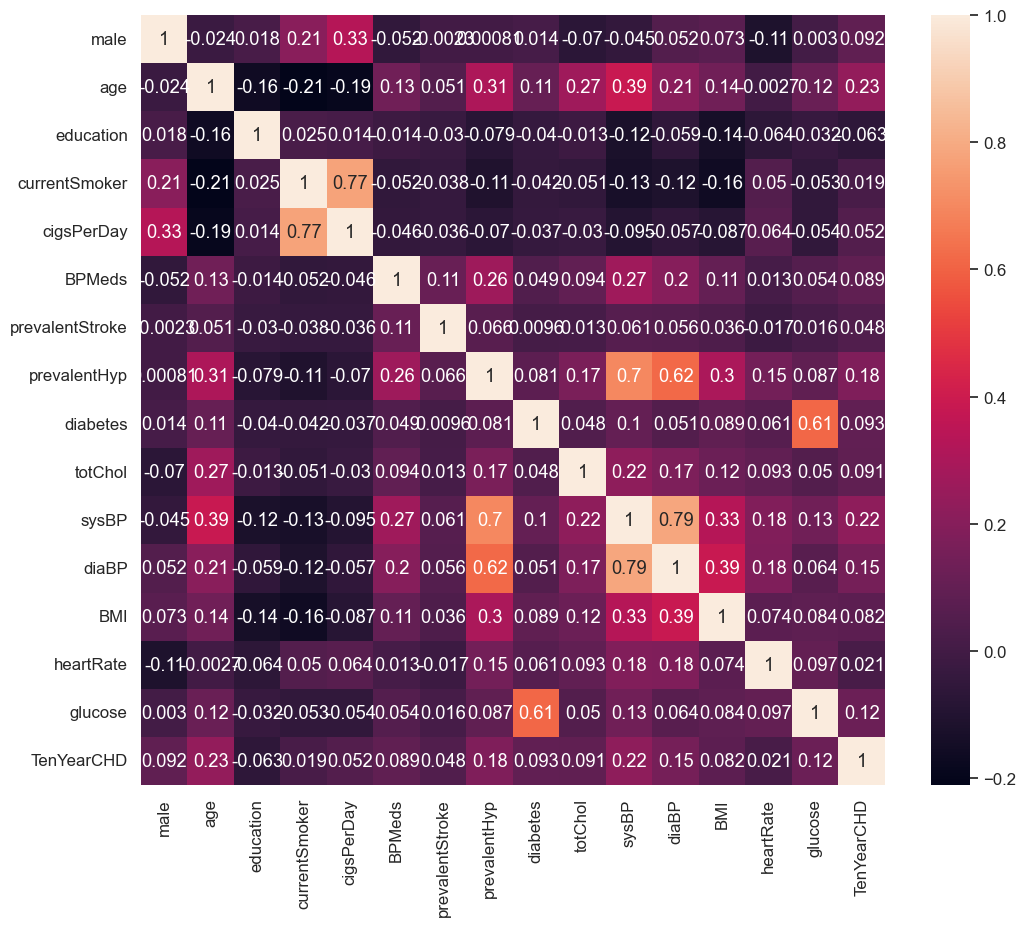

In [48]:
# gtraficar la matriz de correlación

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True)
plt.show()

Se observa que al menos 5 variables tienen correlación relevante, estas variables son `sysBP`, `prevalentHyp`, `BPMeds`, `totChol`, `age`. 

In [50]:
# seleccionar las variables

sel_vars = ['age', 'sysBP', 'BPMeds', 'prevalentHyp', 'totChol']

corr_vars = base_datos[sel_vars].corr()
print(corr_vars)

                   age     sysBP    BPMeds  prevalentHyp   totChol
age           1.000000  0.388551  0.134670      0.306693  0.267764
sysBP         0.388551  1.000000  0.271291      0.697790  0.220130
BPMeds        0.134670  0.271291  1.000000      0.263047  0.094011
prevalentHyp  0.306693  0.697790  0.263047      1.000000  0.167074
totChol       0.267764  0.220130  0.094011      0.167074  1.000000


## **5.0 Ajuste del modelo**  
---

- Ajustar un primer modelo utilizando todas las variables que se definieron como predictoras.
- Calcular y analizar el coeficiente de determinación del modelo
- ¿ El modelo es significativo?

In [51]:
# ajustar modelo de regresión lineal múltiple

modelo = smf.ols('sysBP ~  + age + prevalentHyp + BPMeds + totChol', 
                 data=base_datos).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1032.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:15:20   Log-Likelihood:                -15120.
No. Observations:                3656   AIC:                         3.025e+04
Df Residuals:                    3651   BIC:                         3.028e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       93.2893      1.821     51.234   

Se puede observar un R2 de 0.531, este resultado indica que el modelo tiene cierta capacidad de predicción acertada. Parece que usar estas variables de mayor correlación con la variable predictora no tienen un desempeño de regresión muy alto. Podemos intentar otros modelos con combinación de variables que aporten más a resultado para finalmente entregar las conclusiones.

## **6.0 Modelos adicionales**  
---

- Proponer dos modelos adicionales haciendo selección de variabes regresoras.
- Calcular y analizar el coeficiente de determinación para cada modelo
- ¿ El modelo es significativo?

Teniendo en cuenta las conclusiones del punto anterior, podemos comenzar a suprimir del modelo inicial las variables correlacionadas entre sí, buscando dejar las variables independientes que mejoran el R2 obtenido en el modelo inicial.

Puede usarse el método BackWard Elimination, quitando las variables que menos aportan al modelo. Para el `modelo1` eliminaremos la variable `totChol` que aporta menos al modelo inicial. 

In [53]:
# seleccionar mejores variables regresoras

modelo1 = smf.ols('sysBP ~  age + prevalentHyp + BPMeds', 
                  data=base_datos).fit()

print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:22:00   Log-Likelihood:                -15135.
No. Observations:                3656   AIC:                         3.028e+04
Df Residuals:                    3652   BIC:                         3.030e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       98.8510      1.508     65.554   

En este `modelo1` entrega casi el mismo resultado para R2 de 0.527, decreciendo, efectivamente la variable suprimida no aporta mucho al modelo, así que, en este mismo orden, suprimimos la segunda variable de menos aporte al modelo. Para el `modelo2` eliminamos la variable `age` que es la que menos aporta al `modelo1`.

In [54]:
# seleccionar mejores variables regresoras

modelo2 = smf.ols('sysBP ~ prevalentHyp + BPMeds', 
                  data=base_datos).fit()

print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1792.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:22:16   Log-Likelihood:                -15254.
No. Observations:                3656   AIC:                         3.051e+04
Df Residuals:                    3653   BIC:                         3.053e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      121.9992      0.313    389.824   

Se observa que en este tercer modelo tenemos un resultados menor al segundo modelo, las variables suprimidas, aunque no aportan mucho al desempeño del modelo, si hacen diferencia al combinarlas. Pueden usarse otras combinaciones de las variables, multiplicando unas con otras para llegar a otras conclusiones, sin embargo para este ejercicio se usarán los resultados obtenidos.

## **7.0 Selección del mejor modelo**  
---

- Seleccionar el mejor modelo teniendo en cuenta el coeficiente de determinación u otro método de selección.
- Realizar un diagnóstico gráfico a los residuos del modelo selecconado

In [58]:
# seleccionar el mejor modelo con Stepwise Regression

# def forward_regression(X, y,
#                        threshold_in,
#                        verbose=False):
#     initial_list = []
#     included = list(initial_list)
#     while True:
#         changed=False
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

#         if not changed:
#             break

#     return included

# X = base_datos[['age', 'prevalentHyp', 'BPMeds', 'totChol']]
# y = base_datos['sysBP']

# forward_regression(X, y, 0.05, verbose=True)



Add  prevalentHyp                   with p-value 0.0
Add  age                            with p-value 8.68519e-56
Add  BPMeds                         with p-value 2.04633e-12
Add  totChol                        with p-value 6.91532e-08


['prevalentHyp', 'age', 'BPMeds', 'totChol']

In [59]:
# seleccionar el mejor modelo comparando los r2

if modelo.rsquared > modelo1.rsquared and modelo.rsquared > modelo2.rsquared:
    mejor_modelo = modelo
elif modelo1.rsquared > modelo.rsquared and modelo1.rsquared > modelo2.rsquared:
    mejor_modelo = modelo1
else:
    mejor_modelo = modelo2

print(mejor_modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1032.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:54:22   Log-Likelihood:                -15120.
No. Observations:                3656   AIC:                         3.025e+04
Df Residuals:                    3651   BIC:                         3.028e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       93.2893      1.821     51.234   

El primer `modelo` obtenido es el que mejor r2 entregó.

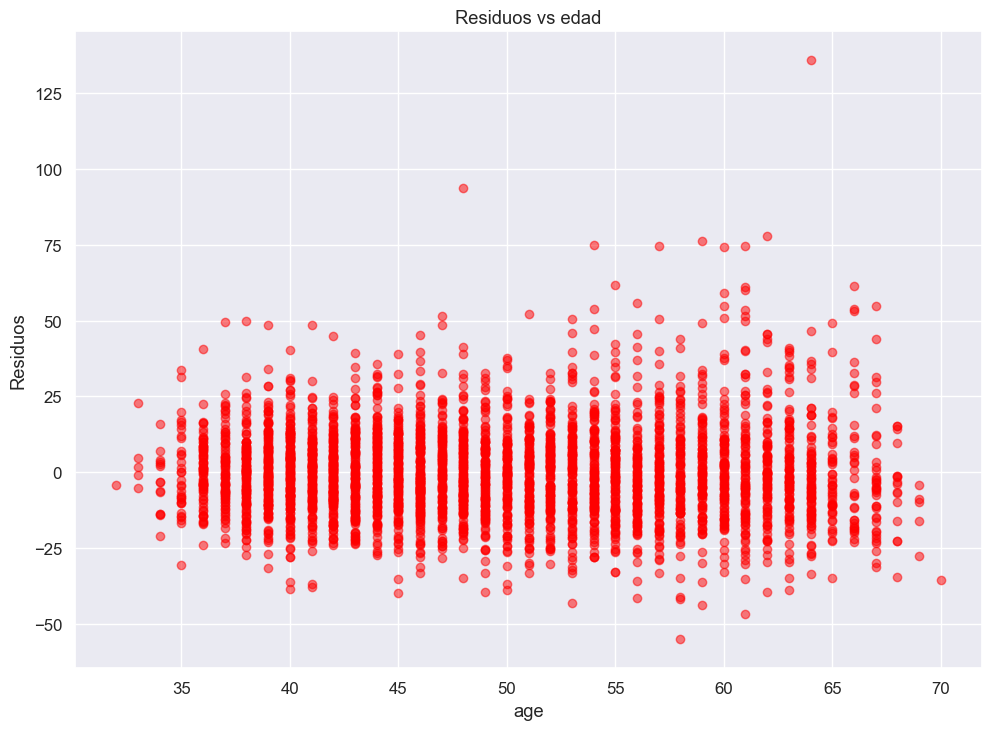

In [65]:
# analizar los residuos del modelo seleccionado

residuos = mejor_modelo.resid

plt.scatter(base_datos['age'], residuos, alpha=0.5, color='red')
plt.xlabel('age')
plt.ylabel('Residuos')
plt.title('Residuos vs edad')
plt.show()

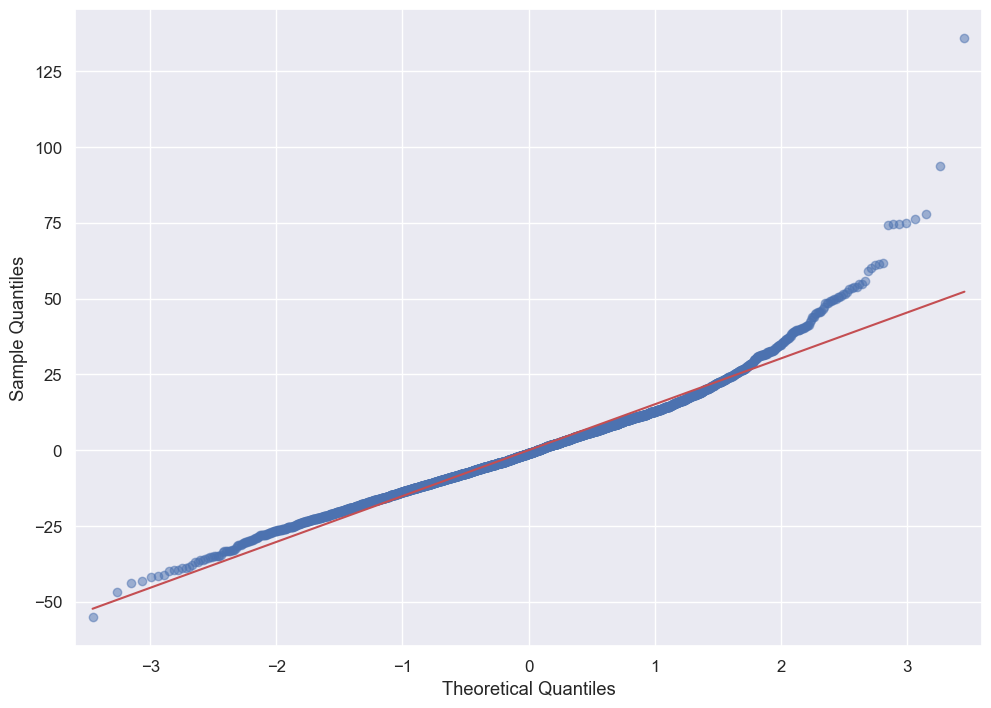

In [69]:
# analizar con grafico QQ si los residuos siguen una distribución normal

sm.qqplot(residuos, line='s', color='red', alpha=0.5)
plt.show()

In [64]:
# realizar prueba de hipótesis de normalidad de los residuos

# H0: Los residuos siguen una distribución normal
# H1: Los residuos no siguen una distribución normal

p_value = scipy.stats.shapiro(residuos)[1]

if p_value < 0.05:
    print('Rechazamos H0, los residuos no siguen una distribución normal')
else:
    print('No rechazamos H0, los residuos siguen una distribución normal')

Rechazamos H0, los residuos no siguen una distribución normal


## **8.0 Verificación de supuestos**  
---

- Realizar un test que permita probar la hipótesis nula de que los residuales siguen una distribución normal.

In [ ]:
# Test de normaliad

Concluir sobre la verificación del supuesto de normalidad en los residuales.


**¡Felicitaciones! ¡Muy buen trabajo!**

Entrega
Para entregar el notebook por favor haga lo siguiente:

1. Descargue el notebook (Archivo -> Descargar .ipynb).
2. Importelo como archivo HTML.
3. Realice el envío del archivo en la tarea dispuesta en el aula virtual.
4. No olvide escribir los nombres de los integrantes del grupo en el momento de hacer la entrega.